# Spatial Signal Separation for Geological magnetic surveys

In [1]:
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt
from magprime.algorithms import PFSS

#### Create Simulation

In [16]:
"10m x 10 m grid"
m1 = magpy.misc.Dipole(moment=(0.522, -0.904, 0.930), position=(0, 0, 0))
m2 = magpy.misc.Dipole(moment=(0.222, 0.504, -0.430), position=(1, -2, 0))
m3 = magpy.misc.Dipole(moment=(0.522, -0.904, 0.930), position=(4, 1, 0))
m4 = magpy.misc.Dipole(moment=(0.222, 0.504, -0.430), position=(-3, -2, 0))
m5 = magpy.misc.Dipole(moment=(0.522, -0.904, 0.930), position=(2, 4, 0))
m6 = magpy.misc.Dipole(moment=(0.222, 0.504, -0.430), position=(-4, 0, 0))
m7 = magpy.misc.Dipole(moment=(0.522, -0.904, 0.930), position=(1, 1, 0))
m8 = magpy.misc.Dipole(moment=(0.222, 0.504, -0.430), position=(2, -2, 0))
background = magpy.misc.Dipole(moment=(0,10000,10000), position=(10, 10, 0))

collection = magpy.Collection(m1, m2, m3, m4, m5, m6, m7, m8, background)
ts = np.linspace(-5, 5, 100)
grid = np.array([[(x, y, .5) for x in ts] for y in ts])
B = collection.getB(grid)
B = np.moveaxis(B, -1, 0)
Bmag = np.linalg.norm(B, axis=0)   

#### Separate Regional Anomalies from Background Field
Beta controls the separation balance between the Sparse and Dense components. Larger beta yields higher thresholds and more aggressive sparsification (fewer nonzeros in X_sparse, but risk throwing away legitimate signal). Smaller beta yields lower thresholds and more entries allowed into X_sparse (denser sparse part, potentially capturing noise).

In [28]:
Xd, Xs = PFSS.pfss(Bmag, r_max=10, beta=0.8, max_iter=2, eps=1e-9, verbose=False)

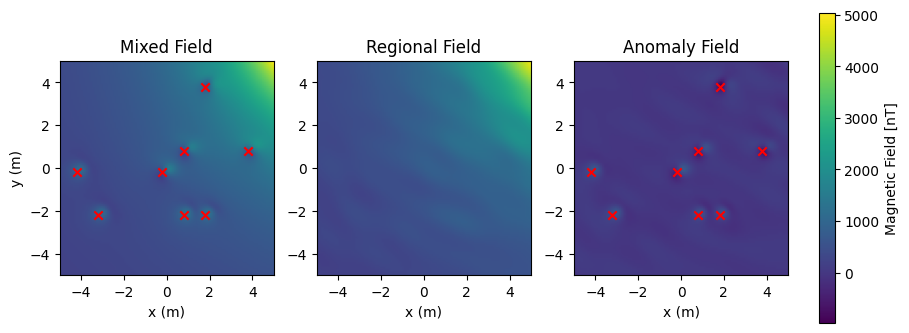

In [29]:
fig, ax = plt.subplots(1,3, figsize = (10, 6), sharex=True,)

vmin = np.min([Bmag, Xs, Xd])*1e9
vmax = np.max([Bmag, Xs, Xd])*1e9

im = ax[0].imshow(Bmag*1e9, extent=[-5, 5, -5, 5], origin='lower', vmin = vmin, vmax = vmax)
ax[0].set_title("Mixed Field")

# Overlay dipole locations
positions = np.array([m.position[:2] for m in (m1, m2, m3, m4, m5, m6, m7, m8)]) - 0.2
ax[0].scatter(positions[:,0], positions[:,1], marker='x', color='red')

ax[1].imshow(Xd*1e9, extent=[-5, 5, -5, 5], origin='lower', vmin = vmin, vmax = vmax)
ax[1].set_title("Regional Field")

ax[2].imshow(Xs*1e9, extent=[-5, 5, -5, 5], origin='lower', vmin = vmin, vmax = vmax)
ax[2].scatter(positions[:,0], positions[:,1], marker='x', color='red')
ax[2].set_title("Anomaly Field")

ax[0].set_xlabel('x (m)')
ax[2].set_xlabel('x (m)')
ax[1].set_xlabel('x (m)')
ax[0].set_ylabel('y (m)')
cbar = fig.colorbar(im, ax=ax.ravel().tolist(), 
                    orientation='vertical', 
                    fraction=0.02, pad=0.04)
cbar.set_label('Magnetic Field [nT]')
plt.show()

# Singular Spectrum Analysis

In [30]:
comps = PFSS.ssa(Bmag, 30)

Text(0, 0.5, 'y (m)')

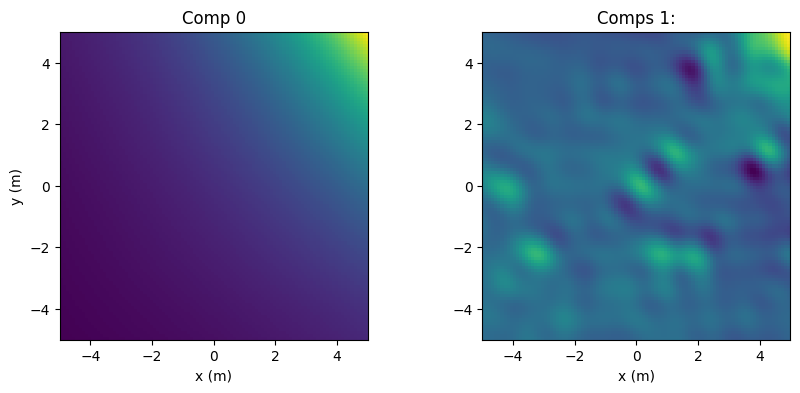

In [31]:
fig, ax = plt.subplots(1,2, figsize = (10, 4), sharex=True)
ax[0].imshow(np.log(comps[0]+1e-3), extent=[-5, 5, -5, 5], origin='lower')
ax[0].set_title("Comp 0")
ax[1].imshow(np.log(np.sum(comps[1:], axis=0)+1e-3), extent=[-5, 5, -5, 5], origin='lower')
ax[1].set_title("Comps 1:")
ax[0].set_xlabel('x (m)')
ax[1].set_xlabel('x (m)')
ax[0].set_ylabel('y (m)')